# 🧁 Limpeza e tratamento de dados de CGM (monitoramento contínuo de glicemia)

In [1]:
#%pip install missingno

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Dataset extraído pelo RStudio através do repositório 
# https://rdrr.io/github/personalscience/psi-shiny-cgm/man/sample_libreview_df.html
df_raw = pd.read_csv('./sample_libreview_df_raw.csv')
df_raw

,Unnamed: 0,time,scan,hist,strip,value,food,user_id
0,1,2021-05-30 16:59:00,NaN,69.0,NaN,69.0,NaN,1234
1,2,2021-05-30 17:14:00,NaN,66.0,NaN,66.0,NaN,1234
2,3,2021-05-30 17:30:00,NaN,62.0,NaN,62.0,NaN,1234
3,4,2021-05-30 17:45:00,NaN,60.0,NaN,60.0,NaN,1234
4,5,2021-05-30 18:00:00,NaN,62.0,NaN,62.0,NaN,1234
...,...,...,...,...,...,...,...,...
3979,3980,2021-07-12 19:27:00,NaN,NaN,NaN,NaN,NaN,1234
3980,3981,2021-07-13 11:25:00,NaN,NaN,NaN,NaN,NaN,1234
3981,3982,2021-07-15 14:17:00,NaN,NaN,NaN,NaN,NaN,1234
3982,3983,2021-07-16 09:31:00,NaN,NaN,NaN,NaN,NaN,1234


In [4]:
# Padronizar o nome das colunas
df_raw.columns = df_raw.columns.str.lower().str.strip().str.replace(' ', '').str.replace(':', '')

# Retiramos duplicatas e formatamos o tipo de dados 
df_raw.drop_duplicates(inplace=True)
df_raw['time'] = pd.to_datetime(df_raw['time'])
df_raw['value'] = pd.to_numeric(df_raw['value'], errors='coerce')
df_raw

,unnamed0,time,scan,hist,strip,value,food,user_id
0,1,2021-05-30 16:59:00,NaN,69.0,NaN,69.0,NaN,1234
1,2,2021-05-30 17:14:00,NaN,66.0,NaN,66.0,NaN,1234
2,3,2021-05-30 17:30:00,NaN,62.0,NaN,62.0,NaN,1234
3,4,2021-05-30 17:45:00,NaN,60.0,NaN,60.0,NaN,1234
4,5,2021-05-30 18:00:00,NaN,62.0,NaN,62.0,NaN,1234
...,...,...,...,...,...,...,...,...
3979,3980,2021-07-12 19:27:00,NaN,NaN,NaN,NaN,NaN,1234
3980,3981,2021-07-13 11:25:00,NaN,NaN,NaN,NaN,NaN,1234
3981,3982,2021-07-15 14:17:00,NaN,NaN,NaN,NaN,NaN,1234
3982,3983,2021-07-16 09:31:00,NaN,NaN,NaN,NaN,NaN,1234


In [5]:
df_raw[df_raw['value'].isnull()]

,unnamed0,time,scan,hist,strip,value,food,user_id
3562,3563,2021-05-30 16:58:00,50.0,NaN,NaN,NaN,NaN,1234
3563,3564,2021-05-30 17:02:00,64.0,NaN,NaN,NaN,NaN,1234
3564,3565,2021-05-30 17:14:00,65.0,NaN,NaN,NaN,NaN,1234
3565,3566,2021-05-30 17:42:00,63.0,NaN,NaN,NaN,NaN,1234
3566,3567,2021-05-30 18:55:00,73.0,NaN,NaN,NaN,NaN,1234
...,...,...,...,...,...,...,...,...
3979,3980,2021-07-12 19:27:00,NaN,NaN,NaN,NaN,NaN,1234
3980,3981,2021-07-13 11:25:00,NaN,NaN,NaN,NaN,NaN,1234
3981,3982,2021-07-15 14:17:00,NaN,NaN,NaN,NaN,NaN,1234
3982,3983,2021-07-16 09:31:00,NaN,NaN,NaN,NaN,NaN,1234


# Retirada das linhas cujo principal valor de referência (value) é igual a NaN

In [6]:
print('Valores nulos antes: \n\n', df_raw.isnull().sum())

Valores nulos antes: 

 unnamed0       0
time           0
scan        3667
hist         422
strip       3984
value        422
food        3981
user_id        0
dtype: int64


In [7]:
df_raw = df_raw.dropna(subset=['value'])
df_raw

,unnamed0,time,scan,hist,strip,value,food,user_id
0,1,2021-05-30 16:59:00,NaN,69.0,NaN,69.0,NaN,1234
1,2,2021-05-30 17:14:00,NaN,66.0,NaN,66.0,NaN,1234
2,3,2021-05-30 17:30:00,NaN,62.0,NaN,62.0,NaN,1234
3,4,2021-05-30 17:45:00,NaN,60.0,NaN,60.0,NaN,1234
4,5,2021-05-30 18:00:00,NaN,62.0,NaN,62.0,NaN,1234
...,...,...,...,...,...,...,...,...
3557,3558,2021-07-20 06:40:00,NaN,79.0,NaN,79.0,NaN,1234
3558,3559,2021-07-20 06:55:00,NaN,77.0,NaN,77.0,NaN,1234
3559,3560,2021-07-20 07:10:00,NaN,80.0,NaN,80.0,NaN,1234
3560,3561,2021-07-20 07:25:00,NaN,83.0,NaN,83.0,NaN,1234


In [8]:
print('Valores nulos depois: \n\n', df_raw.isnull().sum())

Valores nulos depois: 

 unnamed0       0
time           0
scan        3562
hist           0
strip       3562
value          0
food        3562
user_id        0
dtype: int64


# Deletar os valores de 'value' acima de 500 (valor máximo detectado por modelos CGM Libre) e abaixo de zero. Granular 'time' em 'date', 'hour', 'hour_minute' e 'weekday'

In [9]:
df_cgm = df_raw[(df_raw['value'] > 0) & (df_raw['value'] < 500)]

In [10]:
df_cgm['date'] = df_cgm['time'].dt.date
df_cgm['hour'] = df_cgm['time'].dt.hour
df_cgm['weekday'] = df_cgm['time'].dt.day_name()

### VERIFICAR
df_cgm['hour_minute'] = df_cgm['time'].dt.strftime('%H:%M')

In [11]:
df_cgm

,unnamed0,time,scan,hist,strip,value,food,user_id,date,hour,weekday,hour_minute
0,1,2021-05-30 16:59:00,NaN,69.0,NaN,69.0,NaN,1234,2021-05-30,16,Sunday,16:59
1,2,2021-05-30 17:14:00,NaN,66.0,NaN,66.0,NaN,1234,2021-05-30,17,Sunday,17:14
2,3,2021-05-30 17:30:00,NaN,62.0,NaN,62.0,NaN,1234,2021-05-30,17,Sunday,17:30
3,4,2021-05-30 17:45:00,NaN,60.0,NaN,60.0,NaN,1234,2021-05-30,17,Sunday,17:45
4,5,2021-05-30 18:00:00,NaN,62.0,NaN,62.0,NaN,1234,2021-05-30,18,Sunday,18:00
...,...,...,...,...,...,...,...,...,...,...,...,...
3557,3558,2021-07-20 06:40:00,NaN,79.0,NaN,79.0,NaN,1234,2021-07-20,6,Tuesday,06:40
3558,3559,2021-07-20 06:55:00,NaN,77.0,NaN,77.0,NaN,1234,2021-07-20,6,Tuesday,06:55
3559,3560,2021-07-20 07:10:00,NaN,80.0,NaN,80.0,NaN,1234,2021-07-20,7,Tuesday,07:10
3560,3561,2021-07-20 07:25:00,NaN,83.0,NaN,83.0,NaN,1234,2021-07-20,7,Tuesday,07:25


# 🔍 Exploratory Data Analysis (EDA)

In [12]:
print('Quantidade de linhas e colunas:\n', df_cgm.shape, '\n\n---\n')
print('Colunas presentes:\n', df_cgm.columns, '\n---\n')
print('Tipo de dados:\n', df_cgm.dtypes, '\n\n---\n')
print('Quantidade de dados únicos:\n', df_cgm.nunique())

Quantidade de linhas e colunas:
 (3562, 12) 

---

Colunas presentes:
 Index(['unnamed0', 'time', 'scan', 'hist', 'strip', 'value', 'food', 'user_id',
       'date', 'hour', 'weekday', 'hour_minute'],
      dtype='object') 
---

Tipo de dados:
 unnamed0                int64
time           datetime64[ns]
scan                  float64
hist                  float64
strip                 float64
value                 float64
food                   object
user_id                 int64
date                   object
hour                    int64
weekday                object
hour_minute            object
dtype: object 

---

Quantidade de dados únicos:
 unnamed0       3562
time           3562
scan              0
hist            121
strip             0
value           121
food              0
user_id           1
date             45
hour             24
weekday           7
hour_minute    1362
dtype: int64


In [13]:
df_cgm.describe()

,unnamed0,scan,hist,strip,value,user_id,hour
count,3562.000000,0.0,3562.000000,0.0,3562.000000,3562.0,3562.000000
mean,1781.500000,NaN,77.769512,NaN,77.769512,1234.0,11.150758
std,1028.405157,NaN,17.011054,NaN,17.011054,0.0,6.460170
min,1.000000,NaN,40.000000,NaN,40.000000,1234.0,0.000000
25%,891.250000,NaN,68.000000,NaN,68.000000,1234.0,6.000000
50%,1781.500000,NaN,76.000000,NaN,76.000000,1234.0,11.000000
75%,2671.750000,NaN,84.000000,NaN,84.000000,1234.0,17.000000
max,3562.000000,NaN,223.000000,NaN,223.000000,1234.0,23.000000


Quantidade de aparições dos valores medidos para glucose no fluido intersticial (mg/dL)


Text(0.5, 0, 'Glicose (mg/dL)')

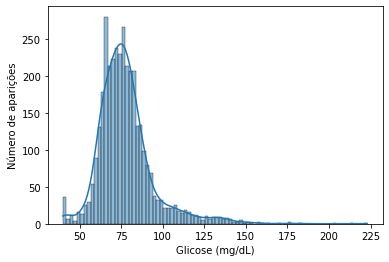

In [14]:
print('Quantidade de aparições dos valores medidos para glucose no fluido intersticial (mg/dL)')
sns.histplot(df_cgm['value'], kde=True)
plt.ylabel('Número de aparições')
plt.xlabel('Glicose (mg/dL)')

Quantidade de medições por dia da semana


Text(0.5, 0, 'Dia da semana')

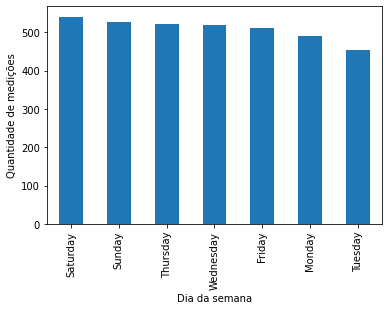

In [15]:
print('Quantidade de medições por dia da semana')
df_cgm['weekday'].value_counts().plot.bar()
plt.ylabel('Quantidade de medições')
plt.xlabel('Dia da semana')

Média das medições nos dias em que houve aferição


Text(0.5, 0, 'Data')

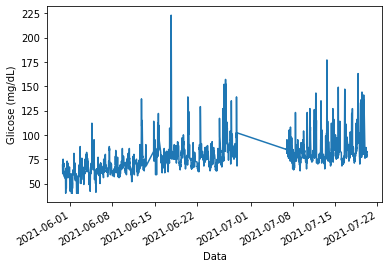

In [16]:
print('Média das medições nos dias em que houve aferição')
df_cgm.groupby('time')['value'].mean().plot()
plt.ylabel('Glicose (mg/dL)')
plt.xlabel('Data')

Número de medições por data


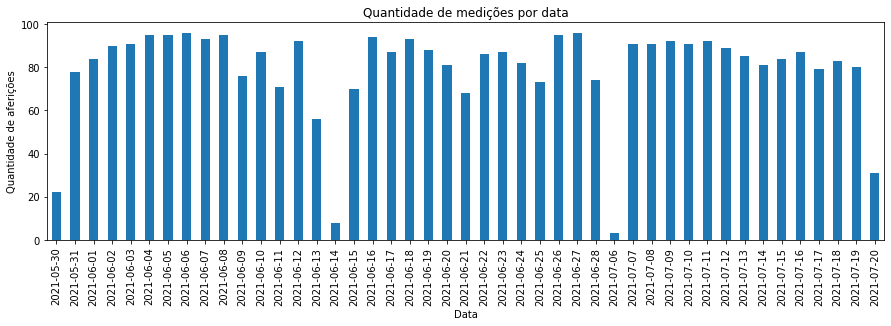

In [17]:
print('Número de medições por data')
df_cgm.groupby('date').size().plot(kind='bar', figsize=(15, 4), title='Quantidade de medições por data')
plt.ylabel('Quantidade de aferições')
plt.xlabel('Data')
plt.show()

## 1. Há relação entre o valor da glicemia (value) e o horário do dia (time)? Em quais horas do dia há maiores picos de glicemia? Em quais horas do dia há menores valores de glicemia? 


In [18]:
# Valores de média, mínimo e máximo valores de glicemia (mg/dL) por hora do dia
df_cgm.groupby('hour')['value'].agg(['mean', 'min', 'max']).round(1)

,mean,min,max
hour,,,
0,74.4,40.0,100.0
1,74.2,40.0,113.0
2,71.6,40.0,107.0
3,69.6,40.0,93.0
4,68.3,40.0,90.0
5,67.7,40.0,91.0
6,68.1,40.0,91.0
7,70.1,40.0,118.0
8,73.1,45.0,136.0


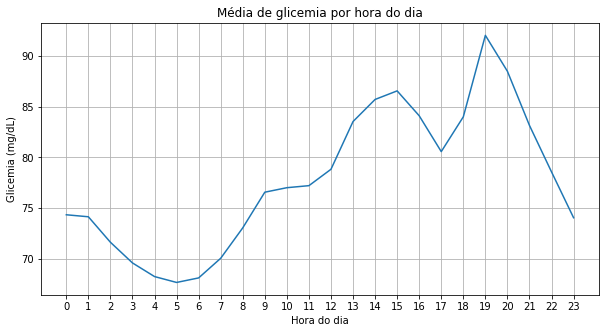

In [19]:
# Gráfico da média de glicemia por hora do dia 
media_por_hora = df_cgm.groupby('hour')['value'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=media_por_hora.index, y=media_por_hora.values)
plt.title('Média de glicemia por hora do dia')
plt.xlabel('Hora do dia')
plt.ylabel('Glicemia (mg/dL)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

# 2. Nos dados analisados, qual a porcentagem do tempo o paciente está dentro, acima ou abaixo dos valores de referência ideais? 

##### Valores ideais:
##### TIR time in range: ≥ 70% do tempo entre 70-180 mg/dL
##### TBR time below range: < 4% do tempo abaixo de 70 mg/dL
##### TBR time very below range: < 1% abaixo de 54 mg/dL
##### TAR time above range: < 25% acima de 180 mg/dL

In [20]:
total = len(df_cgm)
tar = len(df_cgm[df_cgm['value'] > 180]) / total * 100
tir = len(df_cgm[(df_cgm['value'] >= 70) & (df_cgm['value'] <= 180)]) / total * 100
tbr = len(df_cgm[df_cgm['value'] < 70]) / total * 100
tvbr = len(df_cgm[df_cgm['value'] < 54]) / total * 100

In [21]:
tar_check = '✔️' if tar < 25 else '❌'
tir_check = '✔️' if tir >= 70 else '❌'
tbr_check = '✔️' if tbr < 4 else '❌'
tvbr_check = '✔️' if tvbr < 1 else '❌'

In [22]:
print(f'| TAR time above range      | {tar:.1f}%  | < 25% acima de 180 mg/dL           | {tar_check} |')
print(f'| TIR time in range         | {tir:.1f}% |  ≥ 70% do tempo entre 70-180 mg/dL | {tir_check} |')
print(f'| TBR time below range      | {tbr:.1f}% | < 4% do tempo abaixo de 70 mg/dL   | {tbr_check} |')
print(f'| TBR time very below range | {tvbr:.1f}%  | < 1% abaixo de 54 mg/dL            | {tvbr_check} |')

| TAR time above range      | 0.1%  | < 25% acima de 180 mg/dL           | ✔️ |
| TIR time in range         | 69.3% |  ≥ 70% do tempo entre 70-180 mg/dL | ❌ |
| TBR time below range      | 30.5% | < 4% do tempo abaixo de 70 mg/dL   | ❌ |
| TBR time very below range | 2.9%  | < 1% abaixo de 54 mg/dL            | ❌ |


# 3. Dentro do período de medição, houve algum dia em que a média de glicemia destoou muito do normal? Em quais momentos houve episódios de hiper (>180mg/dL) e hipoglicemia? (<70mg/dL)

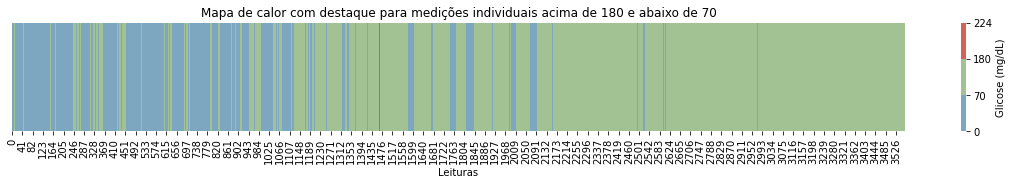

In [23]:
from matplotlib.colors import ListedColormap, BoundaryNorm

mapa_medicoes = df_cgm[['value']]
mapa_medicoes = mapa_medicoes.T

faixas = [0, 70, 180, df_cgm['value'].max() + 1]

# Cores suaves e harmônicas:
colors = ['#7DA6C1', '#A3C293', '#D46256']
cmap = ListedColormap(colors)
norm = BoundaryNorm(faixas, cmap.N)

# Plot
plt.figure(figsize=(20, 2))
sns.heatmap(mapa_medicoes, cmap=cmap, norm=norm, cbar_kws={'label': 'Glicose (mg/dL)'})
plt.yticks([], [])
plt.xlabel("Leituras")
plt.title("Mapa de calor com destaque para medições individuais acima de 180 e abaixo de 70")
plt.show()


# 4. Quão rápido a curva de glicemia tende a voltar para os valores de referência ideais? Há alguma variável que influencia o tempo de retorno?

# 5. Há diferença significativa da média de glicemia entre dias da semana? (dias úteis, fins de semana)

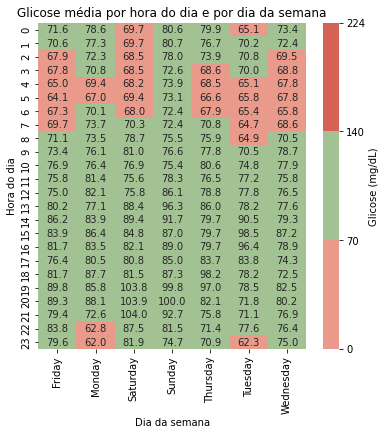

In [24]:
from matplotlib.colors import ListedColormap, BoundaryNorm

tabela = df_cgm.pivot_table(index='hour', columns='weekday', values='value', aggfunc='mean')
max_val = df_cgm['value'].max()

colors = ['#E99A8B', '#A3C293', '#D46256'] 
glucose_range = [0, 70, 140, max_val + 1]

cmap = ListedColormap(colors)
norm = BoundaryNorm(glucose_range, cmap.N)

plt.figure(figsize=(6, 6))
sns.heatmap(tabela, annot=True, fmt=".1f", cmap=cmap, norm=norm, cbar_kws={'label': 'Glicose (mg/dL)'})
plt.title("Glicose média por hora do dia e por dia da semana")
plt.ylabel("Hora do dia")
plt.xlabel("Dia da semana")
plt.show()

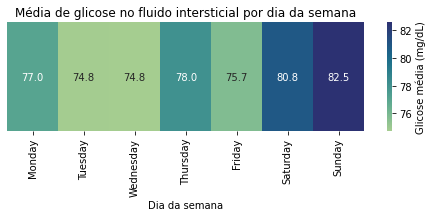

In [25]:
media_por_dia = df_cgm.groupby('weekday')['value'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()

mapa_mediageral = pd.DataFrame([media_por_dia['value'].values], columns=media_por_dia['weekday'].values)

plt.figure(figsize=(8, 2))
sns.heatmap(mapa_mediageral, annot=True, fmt=".1f", cmap="crest", cbar_kws={'label': 'Glicose média (mg/dL)'})
plt.title("Média de glicose no fluido intersticial por dia da semana")
plt.yticks([], []) 
plt.xlabel("Dia da semana")
plt.show()


# 6. Há variação de glicemia significativa durante o período noturno e durante a manhã (4h-8h)? (dawn phenomenon)

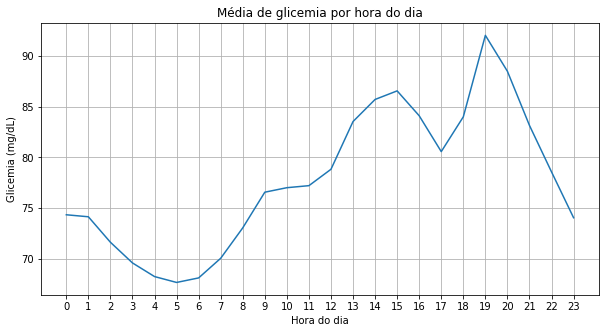

In [26]:
# Gráfico da média de glicemia por hora do dia 
media_por_hora = df_cgm.groupby('hour')['value'].mean()
plt.figure(figsize=(10, 5))
sns.lineplot(x=media_por_hora.index, y=media_por_hora.values)
plt.title('Média de glicemia por hora do dia')
plt.xlabel('Hora do dia')
plt.ylabel('Glicemia (mg/dL)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

# 7. Qual a glicemia média geral do período analisado?

In [27]:
media_global = df_cgm['value'].mean()
media_check = '✔️' if media_global > 70 and media_global < 180 else '❌'
print('Média geral:', media_global, media_check)

Média geral: 77.76951151038742 ✔️


# 8. Qual o desvio padrão ou coeficiente de variação (CV%) da glicemia?

# 9. Quais dias em que houve mais instabilidade (maior variação)?

# 10. Há consistência nos dados? É possível prever quais horas do dia haverá oscilações significativas?

# 11. Há alguma diferença entre a média da primeira e última metade da amostra? Houve alguma diferença no controle ao longo do mês ou permaneceu constante?

In [28]:
# 12. Número e duração média dos episódios de hipoglicemia e hiperglicemia
# 13. Velocidade média de subida e queda da glicemia
# 14. Tempo em hipoglicemia noturna (00h–6h)
# 17. Predição simples com regressão ou modelo de baseline

# Predição com regressão linear

In [32]:
#%pip install scikit-learn

In [31]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [47]:
x = df_cgm[['hour']]
y = df_cgm['value']

In [48]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

In [49]:
modelo = LinearRegression()
modelo.fit(x_treino, y_treino)


LinearRegression()

In [50]:
y_pred = modelo.predict(x_teste)
rmse = np.sqrt(mean_squared_error(y_teste, y_pred))

print("Coeficiente angular (slope):", modelo.coef_[0])
print("Intercepto:", modelo.intercept_)
print("R²:", r2_score(y_teste, y_pred))
print("RMSE:", rmse)

Coeficiente angular (slope): 0.8514617576354322
Intercepto: 68.46207339569814
R²: 0.09780496683460593
RMSE: 16.08572973555114


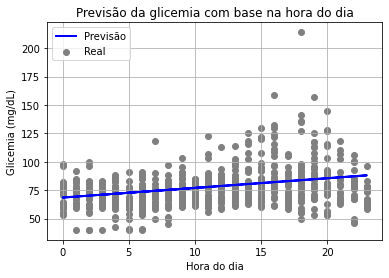

In [51]:
plt.scatter(x_teste, y_teste, color='gray', label='Real')
plt.plot(x_teste, y_pred, color='blue', linewidth=2, label='Previsão')
plt.title('Previsão da glicemia com base na hora do dia')
plt.xlabel('Hora do dia')
plt.ylabel('Glicemia (mg/dL)')
plt.legend()
plt.grid(True)
plt.show()